In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os 
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import (accuracy_score , confusion_matrix ,
                             precision_score , recall_score ,
                             precision_recall_curve,classification_report,
                             ConfusionMatrixDisplay, f1_score)
from sklearn.preprocessing import MinMaxScaler
from sklearn import set_config

In [2]:
set_config(transform_output="pandas")

In [3]:
df = pd.read_csv("ecg/ecg.csv", header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,131,132,133,134,135,136,137,138,139,140
0,-0.112522,-2.827204,-3.773897,-4.349751,-4.376041,-3.474986,-2.181408,-1.818286,-1.250522,-0.477492,...,0.792168,0.933541,0.796958,0.578621,0.257740,0.228077,0.123431,0.925286,0.193137,1.0
1,-1.100878,-3.996840,-4.285843,-4.506579,-4.022377,-3.234368,-1.566126,-0.992258,-0.754680,0.042321,...,0.538356,0.656881,0.787490,0.724046,0.555784,0.476333,0.773820,1.119621,-1.436250,1.0
2,-0.567088,-2.593450,-3.874230,-4.584095,-4.187449,-3.151462,-1.742940,-1.490659,-1.183580,-0.394229,...,0.886073,0.531452,0.311377,-0.021919,-0.713683,-0.532197,0.321097,0.904227,-0.421797,1.0
3,0.490473,-1.914407,-3.616364,-4.318823,-4.268016,-3.881110,-2.993280,-1.671131,-1.333884,-0.965629,...,0.350816,0.499111,0.600345,0.842069,0.952074,0.990133,1.086798,1.403011,-0.383564,1.0
4,0.800232,-0.874252,-2.384761,-3.973292,-4.338224,-3.802422,-2.534510,-1.783423,-1.594450,-0.753199,...,1.148884,0.958434,1.059025,1.371682,1.277392,0.960304,0.971020,1.614392,1.421456,1.0


In [4]:
df.shape

(4998, 141)

In [5]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,...,131,132,133,134,135,136,137,138,139,140
count,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,...,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000
mean,-0.262502,-1.649828,-2.492623,-3.119754,-3.167656,-2.866306,-2.272845,-1.797754,-1.409784,-0.935806,...,0.071312,-0.062622,-0.276086,-0.507750,-0.761323,-0.835173,-0.642739,-0.487667,-0.706574,0.584034
std,1.152450,1.445542,1.386457,1.302921,1.104535,0.906312,0.731594,0.622794,0.636863,0.657788,...,1.404425,1.646105,1.894515,2.059366,2.086130,2.056296,1.859409,1.831088,1.414414,0.492937
min,-6.729499,-7.090374,-5.132459,-5.363241,-5.375715,-5.330194,-4.782240,-4.311288,-4.071361,-4.142476,...,-4.167040,-4.557576,-4.530488,-4.563270,-5.150100,-4.880460,-5.496107,-5.880890,-6.092227,0.000000
25%,-1.004220,-2.701936,-3.668585,-4.227337,-4.007630,-3.480666,-2.779832,-2.165808,-1.773870,-1.362003,...,-1.087720,-1.588237,-2.146835,-2.730750,-3.031224,-2.868603,-2.154560,-1.658289,-1.596809,0.000000
50%,-0.297541,-1.661892,-2.586129,-3.388210,-3.469899,-2.947061,-2.285427,-1.750084,-1.422457,-0.910384,...,0.658318,0.717808,0.604747,0.334857,-0.030767,-0.195151,-0.194423,-0.160262,-0.568443,1.000000
75%,0.499909,-0.677998,-1.514187,-2.235690,-2.531153,-2.398797,-1.823480,-1.484107,-1.063592,-0.476477,...,1.169392,1.238651,1.264379,1.234408,1.033957,0.945027,0.951621,1.002628,0.271635,1.000000
max,4.966414,3.479689,2.660597,1.899798,2.147015,1.614375,1.868728,1.804251,1.683730,1.898627,...,3.007606,2.854680,2.912394,2.937685,3.351437,3.432519,3.579448,4.425976,7.402103,1.000000


In [6]:
df.columns.dtype

dtype('int64')

In [7]:
df.rename(columns={i : f"val-{i}" for i in range(140)}|{140:"label"}, inplace=True)

In [8]:
df.head()

,val-0,val-1,val-2,val-3,val-4,val-5,val-6,val-7,val-8,val-9,...,val-131,val-132,val-133,val-134,val-135,val-136,val-137,val-138,val-139,label
0,-0.112522,-2.827204,-3.773897,-4.349751,-4.376041,-3.474986,-2.181408,-1.818286,-1.250522,-0.477492,...,0.792168,0.933541,0.796958,0.578621,0.257740,0.228077,0.123431,0.925286,0.193137,1.0
1,-1.100878,-3.996840,-4.285843,-4.506579,-4.022377,-3.234368,-1.566126,-0.992258,-0.754680,0.042321,...,0.538356,0.656881,0.787490,0.724046,0.555784,0.476333,0.773820,1.119621,-1.436250,1.0
2,-0.567088,-2.593450,-3.874230,-4.584095,-4.187449,-3.151462,-1.742940,-1.490659,-1.183580,-0.394229,...,0.886073,0.531452,0.311377,-0.021919,-0.713683,-0.532197,0.321097,0.904227,-0.421797,1.0
3,0.490473,-1.914407,-3.616364,-4.318823,-4.268016,-3.881110,-2.993280,-1.671131,-1.333884,-0.965629,...,0.350816,0.499111,0.600345,0.842069,0.952074,0.990133,1.086798,1.403011,-0.383564,1.0
4,0.800232,-0.874252,-2.384761,-3.973292,-4.338224,-3.802422,-2.534510,-1.783423,-1.594450,-0.753199,...,1.148884,0.958434,1.059025,1.371682,1.277392,0.960304,0.971020,1.614392,1.421456,1.0


In [9]:
df['label'] = df['label'].astype(int)

In [10]:
index2label = {1 : "normal", 0 :"abnormal"}

In [11]:
df.iloc[14, :-1].values.__len__()

140

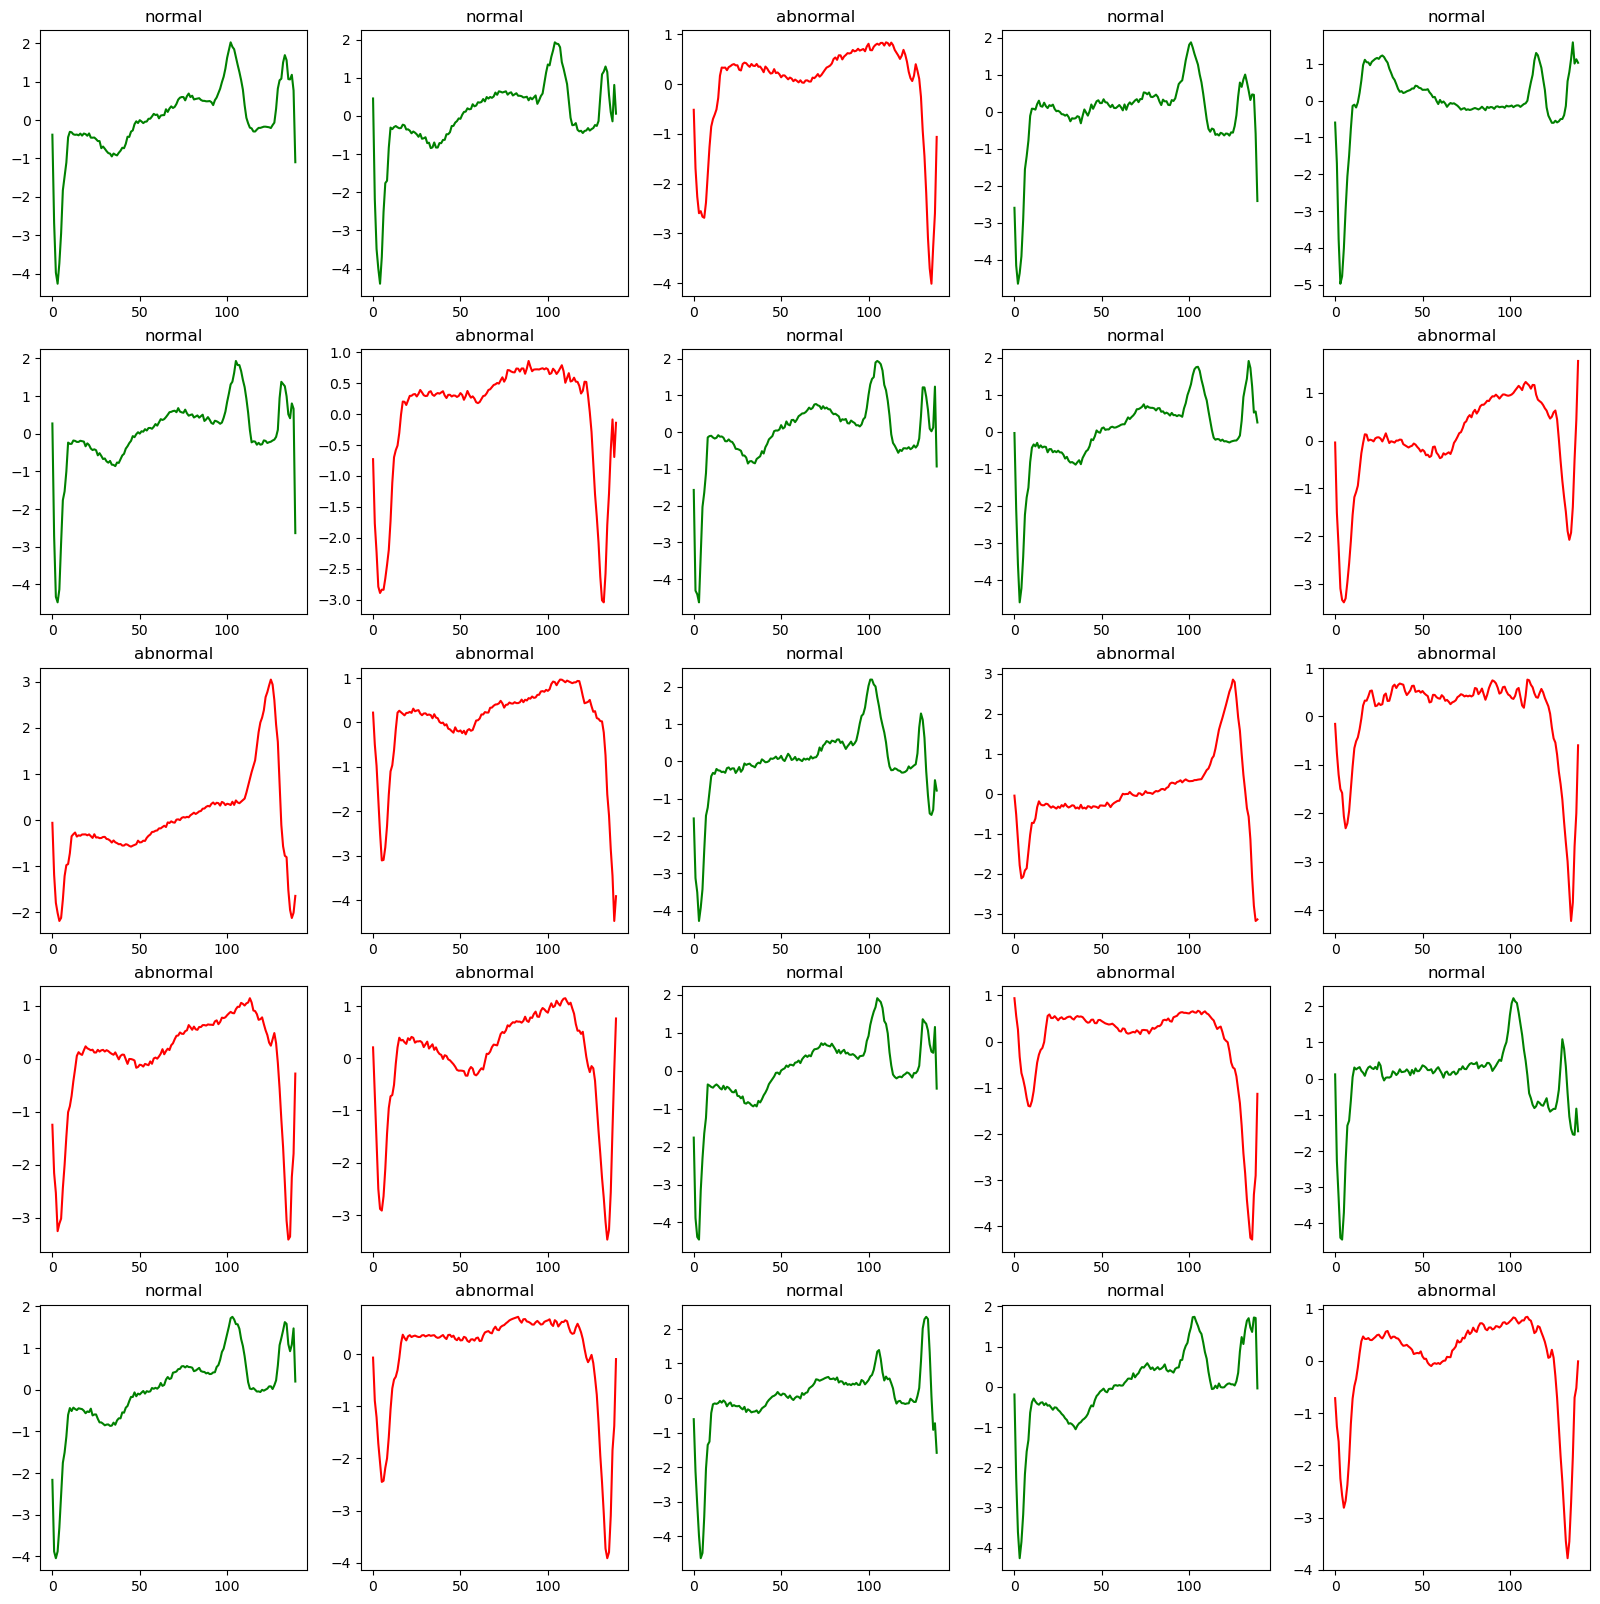

In [12]:
fig, axes = plt.subplots(5 ,5, figsize=(20 , 20))
axes = axes.flatten()
for i, j  in enumerate (np.random.randint(0 , len(df), 25)):
    image = df.iloc[j , :-1].values
    label = df.iloc[j, -1]
    color = "r" if label == 0 else "g"
    axes[i].plot(image, color = color)
    axes[i].set_title("normal" if label == 1 else "abnormal")
plt.show()

<AxesSubplot:ylabel='count'>

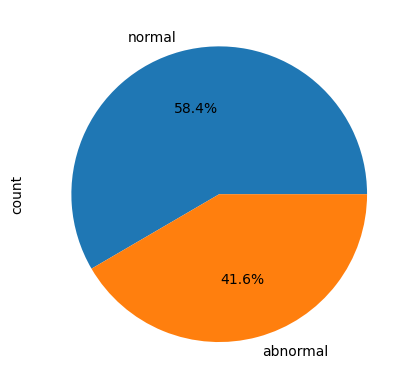

In [13]:
df['label'].value_counts().plot(kind ="pie",labels= ["normal", "abnormal"],  autopct='%1.1f%%')

In [14]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]


In [15]:
scaler = MinMaxScaler((0 ,1))

In [16]:
train, valid = train_test_split(df ,test_size=0.1 , shuffle=True , random_state = 42 )

In [17]:
scaler.fit(train)

MinMaxScaler()

In [18]:
train = scaler.transform(train)

In [19]:
valid, test = train_test_split(valid, test_size=0.1, shuffle=True, random_state=42)

In [20]:
valid = scaler.transform(valid)
test = scaler.transform(test)

In [21]:
train.to_csv("train.csv", index=None)
valid.to_csv("valid.csv", index=None)
test.to_csv("test.csv", index=None)

In [25]:
def parse_csv(raw):
    defaults = [float(i) for i in range(140)]+[0.0]
    *ecg , label = tf.io.decode_csv(raw, defaults)
    ecg = tf.cast(ecg, tf.float32)
    label = tf.cast(label , tf.float32)
    ecg = tf.expand_dims(ecg , axis=-1)
    return ecg , label

In [26]:
trainset = (tf.data.TextLineDataset("train.csv", num_parallel_reads=tf.data.AUTOTUNE)
            .skip(1)
            .map(parse_csv)
            .batch(64)
            .prefetch(tf.data.AUTOTUNE))

In [27]:
validset = (tf.data.TextLineDataset("valid.csv", num_parallel_reads=tf.data.AUTOTUNE)
            .skip(1)
            .map(parse_csv)
            .batch(64)
            .prefetch(tf.data.AUTOTUNE)
)

In [28]:
testset = (tf.data.TextLineDataset("test.csv", num_parallel_reads=tf.data.AUTOTUNE)
            .skip(1)
            .map(parse_csv)
            .batch(64)
            .prefetch(tf.data.AUTOTUNE)
)

In [29]:
for x , y in trainset.take(1):
    print(x.shape)
    print(y.shape)

(64, 140, 1)
(64,)


In [50]:
def build_model(shape=(140,1)):
    input = tf.keras.Input(shape= shape)
    sequence = tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, activation="tanh", return_sequences=True))(input)
    sequence = tf.keras.layers.BatchNormalization()(sequence)
    sequence = tf.keras.layers.Dropout(0.4)(sequence)
    sequence = tf.keras.layers.Conv1D(64 , 3 , 1 , padding='same',kernel_regularizer=tf.keras.regularizers.L1L2())(sequence)
    conv = tf.keras.layers.Conv1D(64 , 3, 1, activation="relu", padding='same',kernel_regularizer=tf.keras.regularizers.L1L2())(input)
    conv = tf.keras.layers.Dropout(0.4)(conv)
    combine = tf.keras.layers.Concatenate()([sequence, conv])
    flatten = tf.keras.layers.Flatten()(combine)
    dense1 = tf.keras.layers.Dense(64 , activation="relu",kernel_regularizer=tf.keras.regularizers.L1L2())(flatten)
    dense1 = tf.keras.layers.Dropout(0.4)(dense1)
    dense2 = tf.keras.layers.Dense(32, activation="relu",kernel_regularizer=tf.keras.regularizers.L1L2())(dense1)
    output = tf.keras.layers.Dense(1 , activation="sigmoid")(dense2)
    model = tf.keras.models.Model(inputs=[input], outputs = [output])
    return model

In [51]:
model = build_model()

In [52]:
model.summary()

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, 140, 1)]     0           []                               
                                                                                                  
 bidirectional_3 (Bidirectional  (None, 140, 128)    33792       ['input_4[0][0]']                
 )                                                                                                
                                                                                                  
 batch_normalization_3 (BatchNo  (None, 140, 128)    512         ['bidirectional_3[0][0]']        
 rmalization)                                                                                     
                                                                                            

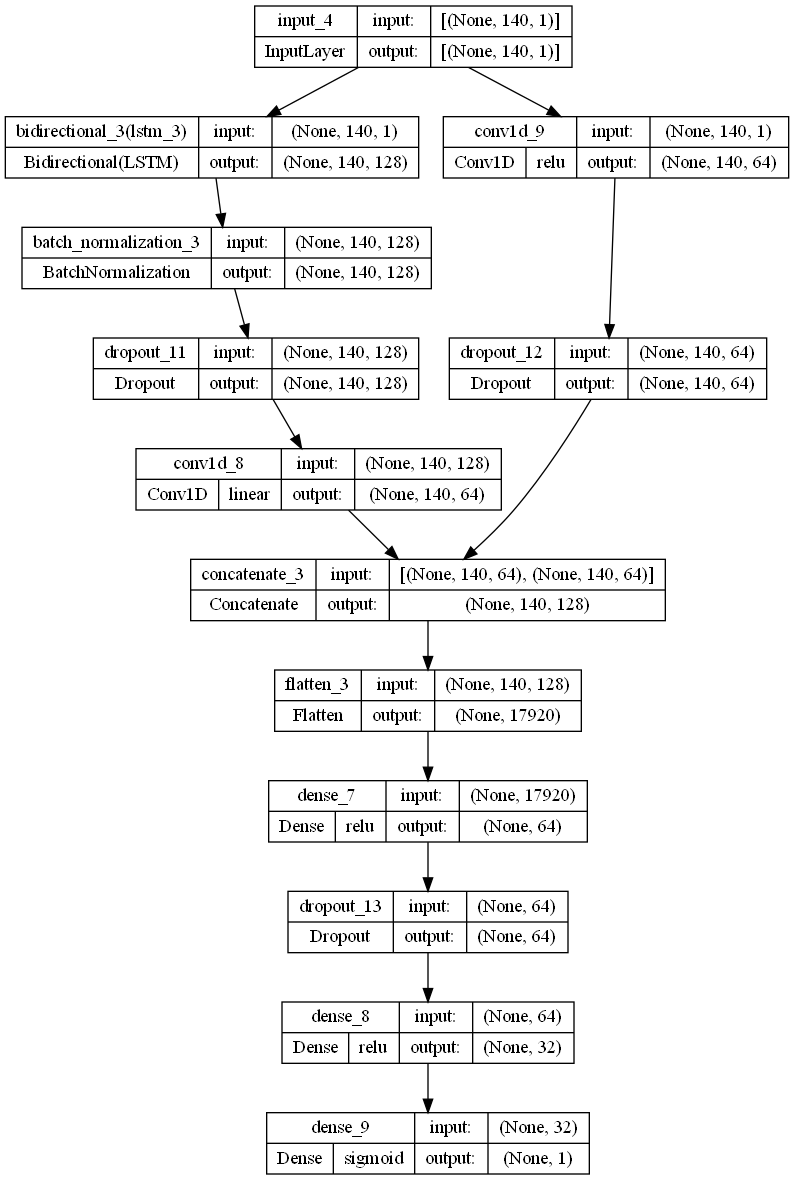

In [53]:
tf.keras.utils.plot_model(model , "model_arch.png", show_shapes=True, show_layer_activations=True)

In [58]:
model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=0.001), loss = tf.keras.losses.BinaryCrossentropy(), 
              metrics=['acc',tf.keras.metrics.BinaryCrossentropy()])


In [59]:
import shutil
shutil.rmtree("logs/log/")

In [60]:
callbacks = [tf.keras.callbacks.ModelCheckpoint("model.h5", monitor="val_loss", mode = "min", save_best_only=True),
             tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=4, mode = "min"),
             tf.keras.callbacks.TensorBoard(log_dir="logs/log", histogram_freq=1)]

In [61]:
history = model.fit(trainset, validation_data= validset , epochs= 60 , 
                    workers=-1, use_multiprocessing=True, callbacks=callbacks)

Epoch 1/60
71/71 [==============================] - 20s 203ms/step - loss: 0.0664 - acc: 0.9844 - binary_crossentropy: 0.0664 - val_loss: 0.5759 - val_acc: 0.7022 - val_binary_crossentropy: 0.5759
Epoch 2/60
71/71 [==============================] - 13s 189ms/step - loss: 0.0433 - acc: 0.9889 - binary_crossentropy: 0.0433 - val_loss: 0.3934 - val_acc: 0.9844 - val_binary_crossentropy: 0.3934
Epoch 3/60
71/71 [==============================] - 14s 200ms/step - loss: 0.0423 - acc: 0.9896 - binary_crossentropy: 0.0423 - val_loss: 0.3930 - val_acc: 0.9733 - val_binary_crossentropy: 0.3930
Epoch 4/60
71/71 [==============================] - 14s 192ms/step - loss: 0.0384 - acc: 0.9893 - binary_crossentropy: 0.0384 - val_loss: 0.2232 - val_acc: 0.9956 - val_binary_crossentropy: 0.2232
Epoch 5/60
71/71 [==============================] - 14s 193ms/step - loss: 0.0359 - acc: 0.9904 - binary_crossentropy: 0.0359 - val_loss: 0.1514 - val_acc: 0.9956 - val_binary_crossentropy: 0.1514
Epoch 6/60
71/7

In [30]:
model = tf.keras.models.load_model("model.h5")

In [31]:
res = model.predict(testset)

1/1 [==============================] - 1s 1s/step


In [32]:
from sklearn.metrics import accuracy_score
accuracy_score(np.where(res >=0.5, 1, 0), test['label'])

1.0

In [183]:
res = pd.DataFrame(history.history)
res.head()

,loss,acc,binary_crossentropy,val_loss,val_acc,val_binary_crossentropy
0,0.066376,0.984438,0.066376,0.575944,0.702222,0.575944
1,0.043292,0.988884,0.043292,0.393427,0.984444,0.393427
2,0.042292,0.989551,0.042292,0.392961,0.973333,0.392961
3,0.038449,0.989329,0.038449,0.223160,0.995556,0.223160
4,0.035928,0.990440,0.035928,0.151416,0.995556,0.151416


Text(0, 0.5, 'loss(cross entropy)')

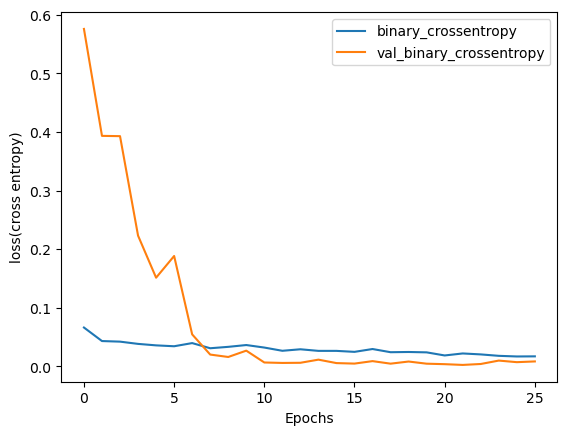

In [184]:
res[['binary_crossentropy', 'val_binary_crossentropy']].plot(kind= "line")
plt.xlabel("Epochs")
plt.ylabel("loss(cross entropy)")

Text(0, 0.5, 'Accuracy')

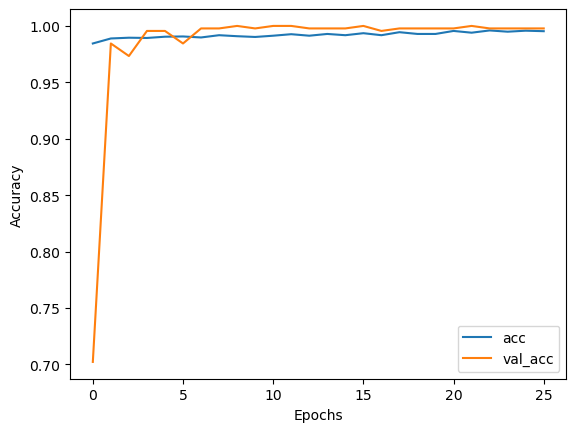

In [67]:
res[['acc', 'val_acc']].plot(kind= "line")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")

In [56]:
%load_ext tensorboard

In [57]:
!kill 5156

kill: 5156: No such process


In [60]:
%tensorboard --logdir logs/log

Reusing TensorBoard on port 6006 (pid 5156), started 15 days, 23:16:41 ago. (Use '!kill 5156' to kill it.)

In [47]:
class ClassificationMetrics:
    def __init__(self, model, x , y, type = "train"):
        self.model = model 
        self.x = x
        self.y = y
        self.y_pred = self.model.predict(self.x)
        self.y_pred = np.where(self.y_pred >0.5, 1, 0)
        self.type = type
    def get_precission_recall_f1score(self):
        precision = precision_score(self.y , self.y_pred)
        recall = recall_score(self.y, self.y_pred)
        report = classification_report(self.y, self.y_pred)
        f1score = f1_score(self.y, self.y_pred)
        print(f"for {self.type} data")
        print(f"if the patient is is normal what probability that model is predict him as normal {precision*100:0.4f}%")
        print(f"if the patient is is normal what probability that patient  is normal {recall*100:0.4f}%")
        print(f"f1_score is {f1score}")
        print(report)
    def plot_confusion_matrix(self, labels=['normal', 'abnormal']):
        cm = confusion_matrix(self.y, self.y_pred , normalize="true")
        fig, ax = plt.subplots(figsize=(4, 4))
        disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
        disp.plot(cmap='Blues', values_format='.2f', ax =ax , colorbar=False)
        ax.set_title(f"Normalized Confusion Matrix for {self.type} data")
        plt.show()        

In [48]:
train_metrics =ClassificationMetrics(model, trainset ,train['label'])
train_metrics.get_precission_recall_f1score()

71/71 [==============================] - 4s 48ms/step
for train data
if the patient is is normal what probability that model is predict him as normal 99.6947%
if the patient is is normal what probability that patient  is normal 99.8471%
f1_score is 0.9977081741787625
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1882
         1.0       1.00      1.00      1.00      2616

    accuracy                           1.00      4498
   macro avg       1.00      1.00      1.00      4498
weighted avg       1.00      1.00      1.00      4498



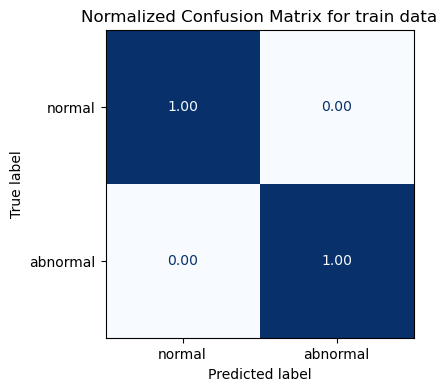

In [49]:
train_metrics.plot_confusion_matrix()

In [52]:
valid_metrics =ClassificationMetrics(model, validset ,valid['label'], "valid")
valid_metrics.get_precission_recall_f1score()

8/8 [==============================] - 1s 48ms/step
for valid data
if the patient is is normal what probability that model is predict him as normal 100.0000%
if the patient is is normal what probability that patient  is normal 100.0000%
f1_score is 1.0
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       181
         1.0       1.00      1.00      1.00       269

    accuracy                           1.00       450
   macro avg       1.00      1.00      1.00       450
weighted avg       1.00      1.00      1.00       450



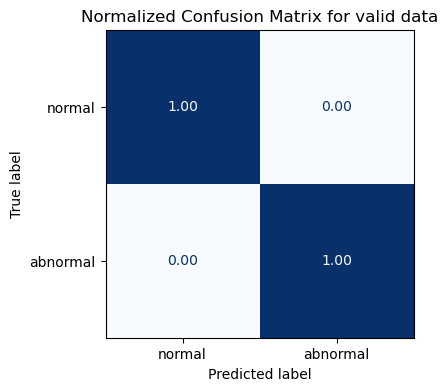

In [53]:
valid_metrics.plot_confusion_matrix()

In [54]:
test_metrics = ClassificationMetrics(model, testset , test['label'], 'test')
test_metrics.get_precission_recall_f1score()

1/1 [==============================] - 0s 272ms/step
for test data
if the patient is is normal what probability that model is predict him as normal 100.0000%
if the patient is is normal what probability that patient  is normal 100.0000%
f1_score is 1.0
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        16
         1.0       1.00      1.00      1.00        34

    accuracy                           1.00        50
   macro avg       1.00      1.00      1.00        50
weighted avg       1.00      1.00      1.00        50



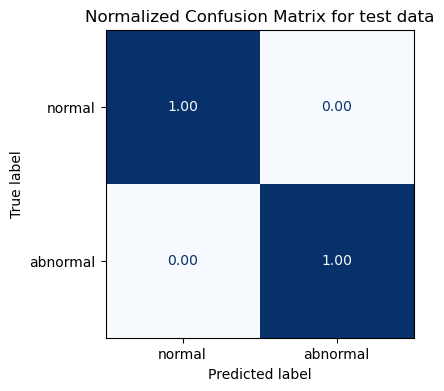

In [55]:
test_metrics.plot_confusion_matrix()

In [74]:
best_model = tf.keras.models.load_model("model.h5")

In [148]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)

In [149]:
converter.optimizations = [tf.lite.Optimize.DEFAULT]

In [150]:
converter.target_spec.supported_ops = [tf.lite.OpsSet.TFLITE_BUILTINS, tf.lite.OpsSet.SELECT_TF_OPS]

In [151]:
with open("model.tflite", "wb") as f:
    f.write(converter.convert())

INFO:tensorflow:Assets written to: C:\Users\ADMINI~1\AppData\Local\Temp\tmptgql24mj\assets


INFO:tensorflow:Assets written to: C:\Users\ADMINI~1\AppData\Local\Temp\tmptgql24mj\assets


In [152]:
interpreter = tf.lite.Interpreter("model.tflite")

In [153]:
interpreter.allocate_tensors()

In [154]:
inputs = interpreter.get_input_details()
outputs = interpreter.get_output_details()

In [155]:
example = test.iloc[10 , :-1].values
example

array([0.46455019, 0.40969295, 0.27809175, 0.25206979, 0.20857074,
       0.22918549, 0.18894934, 0.24839055, 0.41425713, 0.44463816,
       0.48767832, 0.57740563, 0.50712294, 0.46827836, 0.48204245,
       0.51197381, 0.52678848, 0.51486181, 0.54492909, 0.60787704,
       0.61264806, 0.56393742, 0.5473715 , 0.58120065, 0.59205131,
       0.58587832, 0.56051784, 0.50423228, 0.40392653, 0.52872953,
       0.60293473, 0.59706283, 0.60265515, 0.57972972, 0.52327803,
       0.57528666, 0.62139964, 0.63514673, 0.60910142, 0.63488238,
       0.70206877, 0.67623444, 0.61534155, 0.66967019, 0.63121654,
       0.60033065, 0.57412655, 0.60116214, 0.67522095, 0.69497987,
       0.69640512, 0.64198726, 0.59469425, 0.58390037, 0.58801134,
       0.58312206, 0.57787131, 0.61022278, 0.67603073, 0.67983738,
       0.66833413, 0.66267276, 0.64667254, 0.67801249, 0.70404419,
       0.63242768, 0.61244505, 0.64106366, 0.67363432, 0.68222744,
       0.63526755, 0.63450127, 0.61966773, 0.59875854, 0.69536

In [192]:
example.shape

(1, 140, 1)

In [156]:
example = np.expand_dims(example[None] , axis=-1)

In [157]:
interpreter.set_tensor(inputs[0]['index'], example.astype(np.float32))

In [158]:
interpreter.invoke()

In [159]:
out = interpreter.get_tensor(outputs[0]['index'])

In [160]:
out[0][0]

0.9953013

In [161]:
test.iloc[10,-1]

1.0

In [193]:
def predict(ecg_list):
    interpreter = tf.lite.Interpreter("model.tflite")
    interpreter.allocate_tensors()
    inputs = interpreter.get_input_details()
    outputs = interpreter.get_output_details()
    ecg = np.array(ecg_list)
    ecg = ecg / 300.0 #our sensor read from 0 to 300 so we make normalization to be in 0 , 1 AS MODEL TRAINED
    ecg = np.expand_dims(ecg[None], axis=-1)
    ecg = ecg.astype(np.float32)
    interpreter.set_tensor(inputs[0]['index'], ecg)
    interpreter.invoke()
    out = interpreter.get_tensor(outputs[0]['index'])
    res = out[0][0]
    if res > 0.5:
        value = 1
        prob = res
    else :
        value = 0
        prob = 1 - res
    return value, prob 

In [186]:
test.tail()

,val-0,val-1,val-2,val-3,val-4,val-5,val-6,val-7,val-8,val-9,...,val-131,val-132,val-133,val-134,val-135,val-136,val-137,val-138,val-139,label
45,0.661991,0.721441,0.664102,0.651968,0.586524,0.585905,0.470578,0.396180,0.371175,0.386361,...,0.444317,0.393591,0.329542,0.256352,0.231292,0.128470,0.167786,0.063932,0.180108,0.0
46,0.839898,0.830489,0.539732,0.400502,0.233428,0.231655,0.338506,0.505565,0.483220,0.590472,...,0.379331,0.479928,0.541299,0.587623,0.623875,0.636658,0.636670,0.545816,0.462552,1.0
47,0.593540,0.622859,0.565439,0.559960,0.482960,0.429985,0.321461,0.267777,0.260271,0.324829,...,0.066584,0.053386,0.160162,0.326823,0.455804,0.541068,0.627791,0.518772,0.441294,0.0
48,0.616241,0.642874,0.561720,0.552599,0.448318,0.388030,0.302909,0.276924,0.340171,0.436524,...,0.386568,0.284427,0.213085,0.115381,0.090024,0.098254,0.277205,0.361842,0.394684,0.0
49,0.444577,0.261950,0.148836,0.137154,0.210167,0.396001,0.445171,0.434297,0.551816,0.611549,...,0.768194,0.769044,0.768901,0.737461,0.637558,0.637871,0.662297,0.676286,0.345077,1.0


In [187]:
test.reset_index(drop=True,inplace=True)

In [195]:
value, res = predict(test.iloc[13,:-1].to_list())

In [196]:
value, res

(0, 0.9999980291563588)